In [ ]:
import sys
import time

In [ ]:
path_to_module = '/content/drive/MyDrive/CSE591_data/warmup1'
sys.path.append(path_to_module)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torchvision
import torch.nn as nn
from torch import optim
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from torchvision import models

In [ ]:
## Creating a custom Dataset loading class

class CustomDataset(Dataset):
  def __init__(self, label_dir, img_dir, transform):
    # self.img_labels = img_labels
    self.img_dir = img_dir
    self.label_dir = label_dir
    self.df = pd.read_csv(self.label_dir)
    self.transform = transform

    # self.target_transform = target_transform

  def __len__(self):
    return len(self.df)

  def __getitem__(self, idx):
    # img_path = self.img_dir
    self.img_data = torchvision.datasets.ImageFolder(self.img_dir)
    image, self.label = self.img_data[idx]
    if self.transform is not None:
      image = self.transform(image)
    if idx == 0:
      print("Labels: ",self.img_data.class_to_idx)

    return image, self.label


In [ ]:
train_label = '/content/drive/MyDrive/CSE591_data/warmup1/Gender01_Index/list_train.txt'
train_path = '/content/drive/MyDrive/CSE591_data/warmup1/Gender01_Index/train'

test_label = '/content/drive/MyDrive/CSE591_data/warmup1/Gender01_Index/list_test.txt'
test_path = '/content/drive/MyDrive/CSE591_data/warmup1/Gender01_Index/test'

In [ ]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Resize(224),
    transforms.Grayscale(num_output_channels=1)
                                ])
transform

Compose(
    ToTensor()
    Resize(size=224, interpolation=bilinear, max_size=None, antialias=None)
    Grayscale(num_output_channels=1)
)

In [ ]:
train_data = CustomDataset(train_label, train_path, transform = transform)
test_data = CustomDataset(test_label, test_path, transform = transform)

In [ ]:
train_data[1][0].size()

torch.Size([1, 224, 224])

In [ ]:
len(test_data)

92

In [ ]:
train_loader = DataLoader(dataset = train_data, batch_size =16, shuffle=True)
test_loader = DataLoader(dataset = test_data, batch_size =16, shuffle =True)

In [ ]:
img, label = train_data[0]

Labels:  {'female': 0, 'male': 1}


In [ ]:
img.shape

torch.Size([1, 224, 224])

In [ ]:
label

0

## Display the Dataset

In [ ]:
import random
def plot_data(dataset, num_images):
  figure = plt.figure(figsize=(16,16))
  cols, rows = num_images            # pass num_images as a list of cols and rows
  for i in range(0, cols * rows ):
    img, label = random.choice(dataset)
    img = img.squeeze()
    figure.add_subplot(rows, cols, i+1)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img, cmap ='gray')
  return plt.show()

In [ ]:
classes = {'female': 0, 'male': 1}
num_images = [4,4]

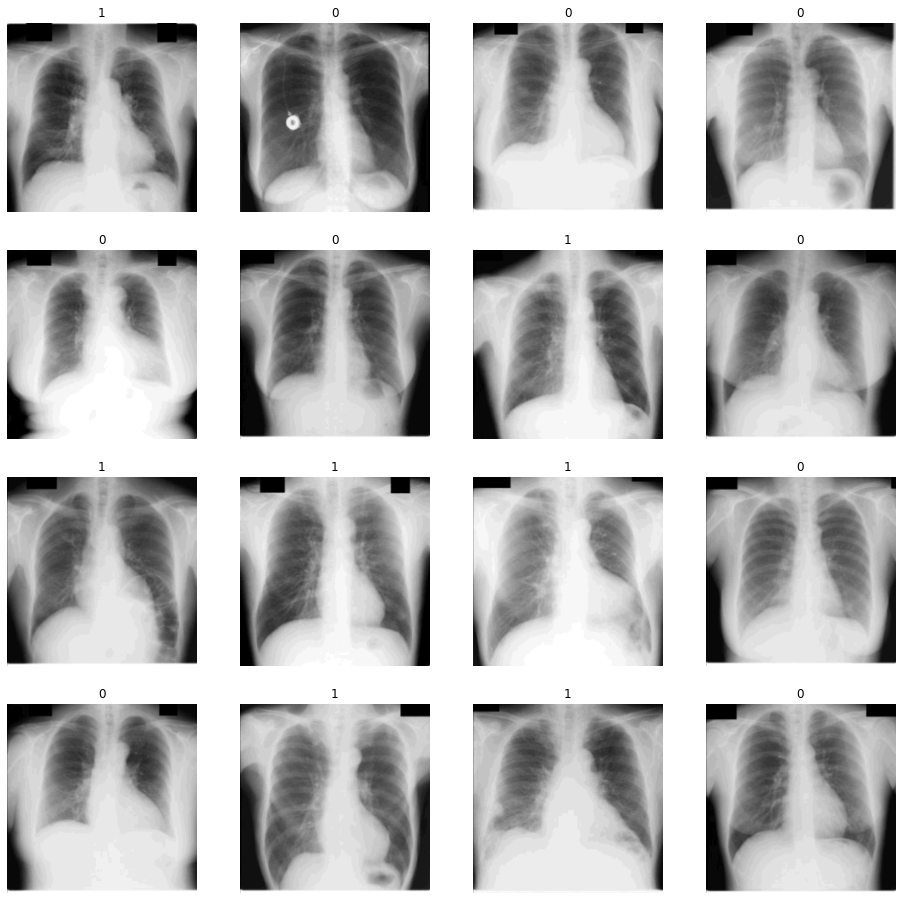

In [ ]:
plot_data(train_data, num_images)

## Creating the training model

In [ ]:
model = models.resnet18(pretrained=True)
model.conv1 = nn.Conv2d(1, 64, (7,7), (2,2), padding = (3,3), bias = False)
model.fc = nn.Linear(512, 2)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [ ]:
model.layer4[-1]

BasicBlock(
  (conv1): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn2): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

In [ ]:
for img, lab in test_loader:
  print(lab)
# plt.imshow(img)

tensor([0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1])
tensor([0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1])
Labels:  {'female': 0, 'male': 1}
tensor([0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1])
tensor([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0])
tensor([0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0])
tensor([1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1])


## Creating the training Model

In [ ]:
criteria = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr =0.01)
epochs = 10

In [ ]:
def train_model(data_loader, model, criteria, optimizer, epochs):
  since = time.time()
  train_loss =[]
  train_acc = []
  pred_label = []

  for epoch in range(1, epochs+1):

    print('Epoch {}/{}'.format(epoch, epochs ))


    model.train()
    running_loss = 0.0
    running_corrects = 0

    for image, labels in data_loader:
      optimizer.zero_grad()
      outputs = model(image)
      _, train_pred = torch.max(outputs, 1)
      pred_label.append(train_pred)
      loss = criteria(outputs, labels)
      loss.backward()
      optimizer.step()

      running_loss += loss.item() * image.size(0)
      running_corrects += torch.sum(train_pred == labels)

    # End of one epoch
    epoch_loss = running_loss / len(train_data)
    epoch_acc = running_corrects.double() / len(train_data)
    train_loss.append(epoch_loss)
    train_acc.append(epoch_acc)

    print('Loss: {:.2f}, Accuracy: {:.2f}'.format(epoch_loss, epoch_acc))


  time_elapsed = time.time() - since
  print("Training Time: {:.0f}m {:.0f}s".format(time_elapsed // 60, time_elapsed % 60))

  return model, train_loss, train_acc, pred_label

In [ ]:
new_model = train_model(train_loader, model, criteria, optimizer, epochs)

Epoch 1/10
Labels:  {'female': 0, 'male': 1}
Loss: 0.50, Accuracy: 0.76
Epoch 2/10
Labels:  {'female': 0, 'male': 1}
Loss: 0.25, Accuracy: 0.93
Epoch 3/10
Labels:  {'female': 0, 'male': 1}
Loss: 0.12, Accuracy: 0.97
Epoch 4/10
Labels:  {'female': 0, 'male': 1}
Loss: 0.06, Accuracy: 0.99
Epoch 5/10
Labels:  {'female': 0, 'male': 1}
Loss: 0.05, Accuracy: 1.00
Epoch 6/10
Labels:  {'female': 0, 'male': 1}
Loss: 0.04, Accuracy: 1.00
Epoch 7/10
Labels:  {'female': 0, 'male': 1}
Loss: 0.03, Accuracy: 1.00
Epoch 8/10
Labels:  {'female': 0, 'male': 1}
Loss: 0.04, Accuracy: 0.99
Epoch 9/10
Labels:  {'female': 0, 'male': 1}
Loss: 0.01, Accuracy: 1.00
Epoch 10/10
Labels:  {'female': 0, 'male': 1}
Loss: 0.02, Accuracy: 1.00
Training Time: 7m 10s


In [ ]:
model

ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
from typing import List, Callable, Optional
from PIL import Image
import pytorch_grad_cam
import cv2
from pytorch_grad_cam import run_dff_on_image, GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image, \
                                        deprocess_image, \
                                        preprocess_image

In [ ]:
class ClassifierOutputTarget:
    def __init__(self, category):
        self.category = category

    def __call__(self, model_output):
        if len(model_output.shape) == 1:
            return model_output[self.category]
        return model_output[:, self.category]

In [ ]:
target = ClassifierOutputTarget(lab)
target.category

tensor([1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1])

In [ ]:
def test_model(data_loader, model, criteria, epochs):
  since = time.time()
  test_loss =[]
  test_acc = []
  tpred_label = []

  for epoch in range(1, epochs+1):

    print('Epoch {}/{}'.format(epoch, epochs ))

    model.eval()
    trunning_loss = 0.0
    trunning_corrects = 0


    with torch.no_grad():
      for image, labels in data_loader:
        i = 0
        # running the regular testing loop for ResNet18 model with regular model and parameters
        image = image.requires_grad_()
        outputs = model(image)
        loss = criteria(outputs, labels)

        _, test_pred = torch.max(outputs, 1)
        tpred_label.append(test_pred)

        trunning_loss += loss.item() * image.size(0)
        trunning_corrects += torch.sum(test_pred == labels)

    # End of one epoch
    epoch_loss = trunning_loss / len(test_data)
    epoch_acc = trunning_corrects.double() / len(test_data)
    test_loss.append(epoch_loss)
    test_acc.append(epoch_acc)

    print('Loss: {:.2f}, Accuracy: {:.2f}'.format(epoch_loss, epoch_acc))


  time_elapsed = time.time() - since
  print("Training Time: {:.0f}m {:.0f}s".format(time_elapsed // 60, time_elapsed % 60))

  return model, test_loss, test_acc, tpred_label

In [ ]:
new_model = test_model(test_loader, model, criteria, epochs)

Epoch 1/10
Labels:  {'female': 0, 'male': 1}
Loss: 0.38, Accuracy: 0.88
Epoch 2/10
Labels:  {'female': 0, 'male': 1}
Loss: 0.38, Accuracy: 0.88
Epoch 3/10
Labels:  {'female': 0, 'male': 1}
Loss: 0.38, Accuracy: 0.88
Epoch 4/10
Labels:  {'female': 0, 'male': 1}
Loss: 0.38, Accuracy: 0.88
Epoch 5/10
Labels:  {'female': 0, 'male': 1}
Loss: 0.38, Accuracy: 0.88
Epoch 6/10
Labels:  {'female': 0, 'male': 1}
Loss: 0.38, Accuracy: 0.88
Epoch 7/10
Labels:  {'female': 0, 'male': 1}
Loss: 0.38, Accuracy: 0.88
Epoch 8/10
Labels:  {'female': 0, 'male': 1}
Loss: 0.38, Accuracy: 0.88
Epoch 9/10
Labels:  {'female': 0, 'male': 1}
Loss: 0.38, Accuracy: 0.88
Epoch 10/10
Labels:  {'female': 0, 'male': 1}
Loss: 0.38, Accuracy: 0.88
Training Time: 1m 12s


In [ ]:
img, lab = test_data[3]
lab

0

### Visualizing the features detected by the ResNet18 model to classify X-Rays images between Male and Female


### Class Representation = Female:0, Male:1

In [ ]:
for img1, lab1 in (test_loader):
  print(lab1)

tensor([0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0])
tensor([0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1])
tensor([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
tensor([1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])
Labels:  {'female': 0, 'male': 1}
tensor([0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1])
tensor([1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1])


In [ ]:
model, test_loss, test_acc, tpred_label = new_model

In [ ]:
(tpred_label[-6:])

[tensor([1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0]),
 tensor([1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0]),
 tensor([1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1]),
 tensor([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0]),
 tensor([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0]),
 tensor([0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0])]

Labels:  {'female': 0, 'male': 1}
Label:  0


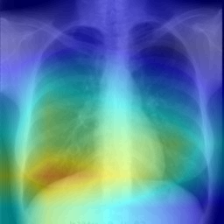

Label:  0


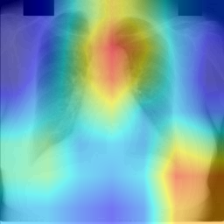

Label:  0


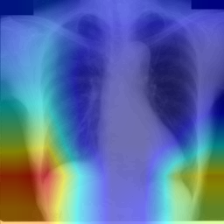

Label:  0


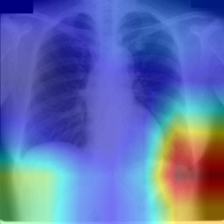

Label:  0


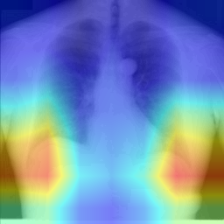

Label:  0


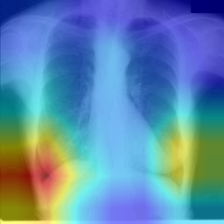

Label:  0


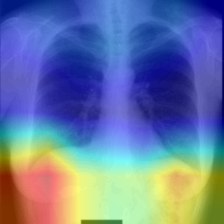

Label:  0


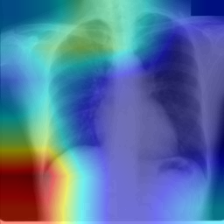

Label:  0


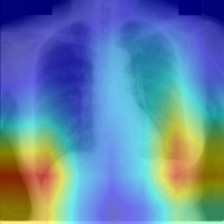

Label:  0


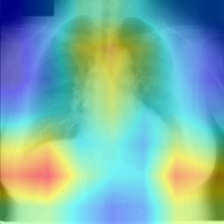

In [ ]:
# grad-cam stuff
transform_pil = transforms.ToPILImage()
target_layers = [model.layer4[-1]]
cam =  GradCAM(model = model, target_layers = target_layers)

for i in range (0,10):
  sample = test_data[i]
  image, label = sample
  print('Label: ', label)

  img = transform_pil(image).convert('RGB')
  image = image.unsqueeze(0)
  img = (img - np.min(img)) / (np.max(img) - np.min(img))

  grayscale_cam = cam(input_tensor = image, aug_smooth=True, eigen_smooth=False)
  grayscale_cam = grayscale_cam[0, :]
  visualization = show_cam_on_image(img, grayscale_cam, use_rgb=True)

  display(Image.fromarray(visualization, 'RGB') )


In [ ]:
len(test_data)

92

Label:  1


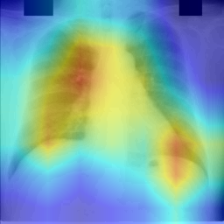

Label:  1


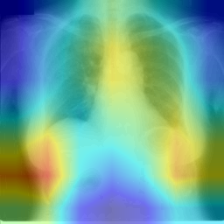

Label:  1


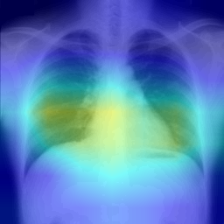

Label:  1


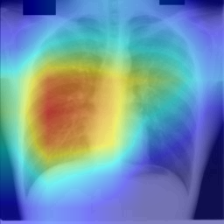

Label:  1


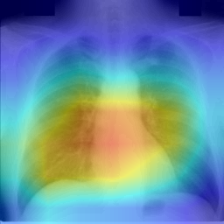

Label:  1


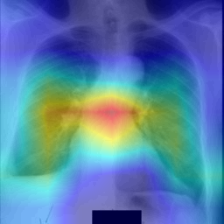

Label:  1


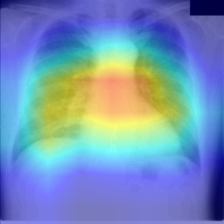

Label:  1


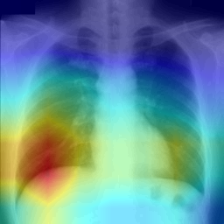

Label:  1


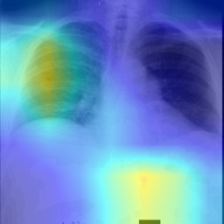

Label:  1


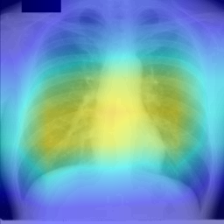

Label:  1


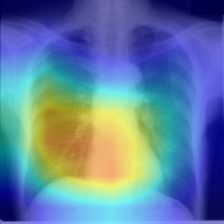

In [ ]:
# grad-cam stuff
transform_pil = transforms.ToPILImage()
target_layers = [model.layer4[-1]]
cam =  GradCAM(model = model, target_layers = target_layers)

for i in range (81,92):
  sample = test_data[i]
  image, label = sample
  print('Label: ', label)

  img = transform_pil(image).convert('RGB')
  image = image.unsqueeze(0)
  img = (img - np.min(img)) / (np.max(img) - np.min(img))

  grayscale_cam = cam(input_tensor = image, aug_smooth = True)
  grayscale_cam = grayscale_cam[0, :]
  visualization = show_cam_on_image(img, grayscale_cam, use_rgb=True)

  display(Image.fromarray(visualization, 'RGB') )